In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['font.size'] = 18

In [7]:
data = pd.read_csv('GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv')
data.head(10)

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
5,Arlan Ramlan,Bagus,4,2022-02-01 05:50:40,4.9.3
6,Slamet Hariyanto,Coba dulu,2,2021-12-10 22:40:45,4.9.3
7,Hasan Thio,Ok,5,2022-02-01 03:07:45,4.9.3
8,RAFI BADZLIN,Gimana ini kak pin saya salah terus padahal ud...,1,2022-12-17 08:56:52,4.9.3
9,mariyadi qc,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,2022-02-09 11:27:38,4.9.3


In [8]:
print(f'jumlah sampel data: {data.shape[0]}\nJumlah Kolom: {data.shape[1]}')

jumlah sampel data: 225002
Jumlah Kolom: 5


In [9]:
data = data.head(5000)
print(f'jumlah sampel data: {data.shape[0]}\nJumlah Kolom: {data.shape[1]}')

jumlah sampel data: 5000
Jumlah Kolom: 5


In [10]:
jumlah_score = data['score'].value_counts().sort_index()
jumlah_score

1    1417
2     283
3     235
4     283
5    2782
Name: score, dtype: int64

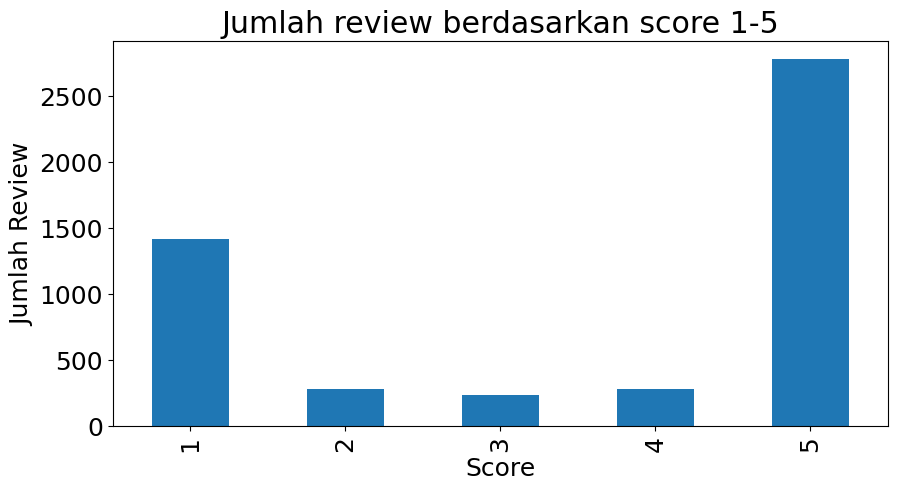

In [11]:
plt.figure(figsize=(10, 5))
jumlah_score.plot(kind='bar')
plt.title('Jumlah review berdasarkan score 1-5')
plt.xlabel('Score')
plt.ylabel('Jumlah Review')
plt.show()

In [12]:
def transform_scores(score):
    if score == 5 or score == 4:
        return "Positif"
    if score == 3:
        return "Netral"
    if score == 2 or score == 1:
        return "Negatif"

In [13]:
data['score'] = data['score'].apply(transform_scores)
data['length'] = data['content'].str.len()

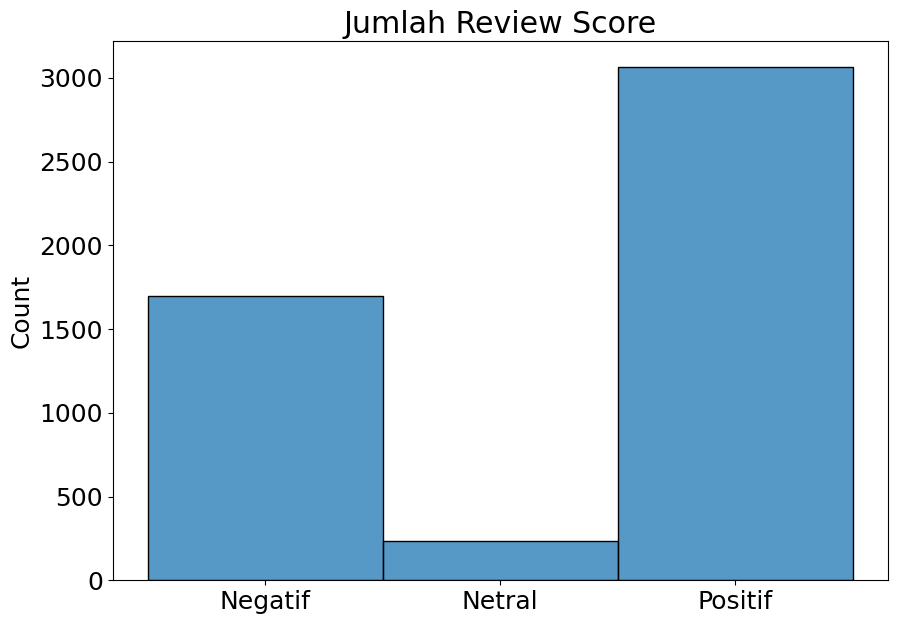

In [14]:
sns.histplot(data['score'])
plt.title('Jumlah Review Score')
plt.xlabel('')
plt.show()

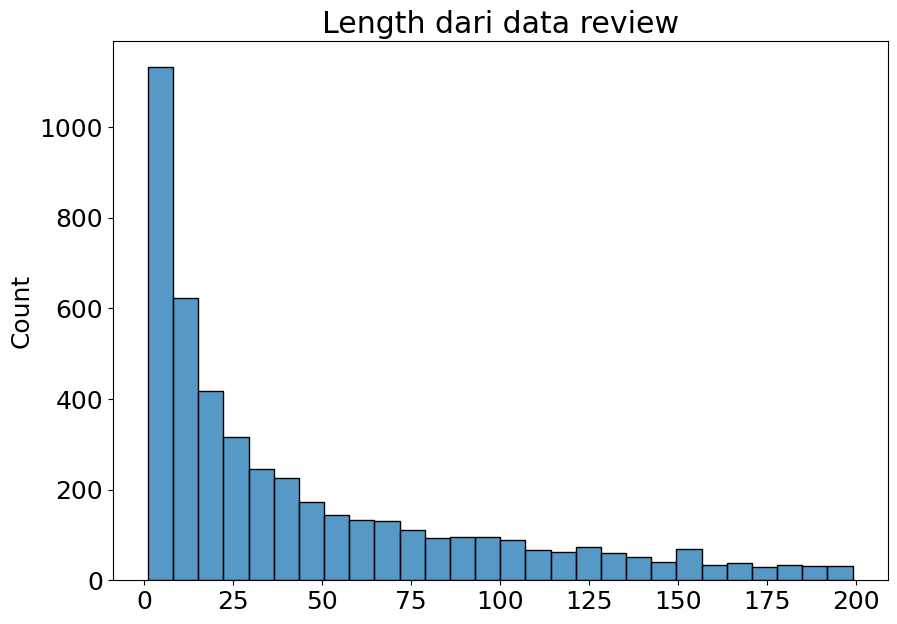

In [15]:
sns.histplot(data['length'][data.length<200])
plt.title('Length dari data review')
plt.xlabel('')
plt.show()

In [16]:
data.loc[:,'content'] = data.loc[:,'content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head(10)

,userName,content,score,at,appVersion,length
0,Yuga Edit,akun gopay saya di blok,Negatif,2022-01-21 10:52:12,4.9.3,23
1,ff burik,lambat sekali sekarang ini bosssku apk gojek g...,Netral,2021-11-30 15:40:38,4.9.3,57
2,Anisa Suci Rahmayuliani,kenapa sih dari kemarin sy buka aplikasi gojek...,Positif,2021-11-29 22:58:12,4.9.3,136
3,naoki yakuza,baru download gojek dan hape baru trus ditop u...,Negatif,2022-09-03 15:21:17,4.9.3,269
4,Trio Sugianto,mantap,Positif,2022-01-15 10:05:27,4.9.3,6
5,Arlan Ramlan,bagus,Positif,2022-02-01 05:50:40,4.9.3,5
6,Slamet Hariyanto,coba dulu,Negatif,2021-12-10 22:40:45,4.9.3,9
7,Hasan Thio,ok,Positif,2022-02-01 03:07:45,4.9.3,2
8,RAFI BADZLIN,gimana ini kak pin saya salah terus padahal ud...,Negatif,2022-12-17 08:56:52,4.9.3,68
9,mariyadi qc,biar aman kamu tidak bisa pakai gojek jadi say...,Negatif,2022-02-09 11:27:38,4.9.3,66


In [17]:
import re
data.loc[:,'content'] = data.loc[:,'content'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))
data.head(10)

,userName,content,score,at,appVersion,length
0,Yuga Edit,akun gopay saya di blok,Negatif,2022-01-21 10:52:12,4.9.3,23
1,ff burik,lambat sekali sekarang ini bosssku apk gojek g...,Netral,2021-11-30 15:40:38,4.9.3,57
2,Anisa Suci Rahmayuliani,kenapa sih dari kemarin sy buka aplikasi gojek...,Positif,2021-11-29 22:58:12,4.9.3,136
3,naoki yakuza,baru download gojek dan hape baru trus ditop u...,Negatif,2022-09-03 15:21:17,4.9.3,269
4,Trio Sugianto,mantap,Positif,2022-01-15 10:05:27,4.9.3,6
5,Arlan Ramlan,bagus,Positif,2022-02-01 05:50:40,4.9.3,5
6,Slamet Hariyanto,coba dulu,Negatif,2021-12-10 22:40:45,4.9.3,9
7,Hasan Thio,ok,Positif,2022-02-01 03:07:45,4.9.3,2
8,RAFI BADZLIN,gimana ini kak pin saya salah terus padahal ud...,Negatif,2022-12-17 08:56:52,4.9.3,68
9,mariyadi qc,biar aman kamu tidak bisa pakai gojek jadi say...,Negatif,2022-02-09 11:27:38,4.9.3,66


In [18]:
stop_words = stopwords.words('indonesian')
data.loc[:,'content'] = data.loc[:,'content'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
data.head(10)

,userName,content,score,at,appVersion,length
0,Yuga Edit,akun gopay blok,Negatif,2022-01-21 10:52:12,4.9.3,23
1,ff burik,lambat bosssku apk gojek gk kaya,Netral,2021-11-30 15:40:38,4.9.3,57
2,Anisa Suci Rahmayuliani,sih kemarin sy buka aplikasi gojek kasih binta...,Positif,2021-11-29 22:58:12,4.9.3,136
3,naoki yakuza,download gojek hape trus ditop u gopay transak...,Negatif,2022-09-03 15:21:17,4.9.3,269
4,Trio Sugianto,mantap,Positif,2022-01-15 10:05:27,4.9.3,6
5,Arlan Ramlan,bagus,Positif,2022-02-01 05:50:40,4.9.3,5
6,Slamet Hariyanto,coba,Negatif,2021-12-10 22:40:45,4.9.3,9
7,Hasan Thio,ok,Positif,2022-02-01 03:07:45,4.9.3,2
8,RAFI BADZLIN,gimana kak pin salah udah ubah salah,Negatif,2022-12-17 08:56:52,4.9.3,68
9,mariyadi qc,biar aman pakai gojek uninstal biar aman,Negatif,2022-02-09 11:27:38,4.9.3,66


In [19]:
from nlp_id.lemmatizer import Lemmatizer
from indoNLP.preprocessing import replace_slang, replace_word_elongation

lemmatizer = Lemmatizer()

data.loc[:, 'content'] = data.loc[:, 'content'].apply(lambda text: " ".join(lemmatizer.lemmatize(word) for word in text.split()))
data.head(10)

,userName,content,score,at,appVersion,length
0,Yuga Edit,akun gopay blok,Negatif,2022-01-21 10:52:12,4.9.3,23
1,ff burik,lambat bosssku apk gojek gk kaya,Netral,2021-11-30 15:40:38,4.9.3,57
2,Anisa Suci Rahmayuliani,sih kemarin sy buka aplikasi gojek kasih binta...,Positif,2021-11-29 22:58:12,4.9.3,136
3,naoki yakuza,download gojek hape trus top u gopay transaksi...,Negatif,2022-09-03 15:21:17,4.9.3,269
4,Trio Sugianto,mantap,Positif,2022-01-15 10:05:27,4.9.3,6
5,Arlan Ramlan,bagus,Positif,2022-02-01 05:50:40,4.9.3,5
6,Slamet Hariyanto,coba,Negatif,2021-12-10 22:40:45,4.9.3,9
7,Hasan Thio,ok,Positif,2022-02-01 03:07:45,4.9.3,2
8,RAFI BADZLIN,gimana kak pin salah udah ubah salah,Negatif,2022-12-17 08:56:52,4.9.3,68
9,mariyadi qc,biar aman pakai gojek uninstal biar aman,Negatif,2022-02-09 11:27:38,4.9.3,66


In [20]:
lemmatizer.lemmatize("Kita kesana dengan seorang anak, Anak yang tangkas dan juga pemberani")

'kita kesana dengan orang anak anak yang tangkas dan juga berani'

In [21]:
data.loc[:, 'content'] = data.loc[: ,'content'].apply(lambda text: " ".join(replace_slang(word) for word in text.split()))
data.head(10)

,userName,content,score,at,appVersion,length
0,Yuga Edit,akun gopay blok,Negatif,2022-01-21 10:52:12,4.9.3,23
1,ff burik,lambat bosssku apk gojek enggak kayak,Netral,2021-11-30 15:40:38,4.9.3,57
2,Anisa Suci Rahmayuliani,sih kemarin saya buka aplikasi gojek kasih bin...,Positif,2021-11-29 22:58:12,4.9.3,136
3,naoki yakuza,download gojek hape terus top lu gopay transak...,Negatif,2022-09-03 15:21:17,4.9.3,269
4,Trio Sugianto,mantap,Positif,2022-01-15 10:05:27,4.9.3,6
5,Arlan Ramlan,bagus,Positif,2022-02-01 05:50:40,4.9.3,5
6,Slamet Hariyanto,coba,Negatif,2021-12-10 22:40:45,4.9.3,9
7,Hasan Thio,ok,Positif,2022-02-01 03:07:45,4.9.3,2
8,RAFI BADZLIN,bagaimana kak pin salah sudah ubah salah,Negatif,2022-12-17 08:56:52,4.9.3,68
9,mariyadi qc,biar aman pakai gojek uninstal biar aman,Negatif,2022-02-09 11:27:38,4.9.3,66


In [22]:
data.loc[:, 'content'] = data.loc[:,'content'].apply(lambda text: " ".join(replace_word_elongation(word) for word in text.split()))
data.head(10)

,userName,content,score,at,appVersion,length
0,Yuga Edit,akun gopay blok,Negatif,2022-01-21 10:52:12,4.9.3,23
1,ff burik,lambat bosssku apk gojek enggak kayak,Netral,2021-11-30 15:40:38,4.9.3,57
2,Anisa Suci Rahmayuliani,sih kemarin saya buka aplikasi gojek kasih bin...,Positif,2021-11-29 22:58:12,4.9.3,136
3,naoki yakuza,download gojek hape terus top lu gopay transak...,Negatif,2022-09-03 15:21:17,4.9.3,269
4,Trio Sugianto,mantap,Positif,2022-01-15 10:05:27,4.9.3,6
5,Arlan Ramlan,bagus,Positif,2022-02-01 05:50:40,4.9.3,5
6,Slamet Hariyanto,coba,Negatif,2021-12-10 22:40:45,4.9.3,9
7,Hasan Thio,ok,Positif,2022-02-01 03:07:45,4.9.3,2
8,RAFI BADZLIN,bagaimana kak pin salah sudah ubah salah,Negatif,2022-12-17 08:56:52,4.9.3,68
9,mariyadi qc,biar aman pakai gojek uninstal biar aman,Negatif,2022-02-09 11:27:38,4.9.3,66


In [23]:
replace_word_elongation("haloooooooooo")

'halo'

In [24]:
X = data['content']
y = data['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3750,), (1250,), (3750,), (1250,))

In [25]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [26]:
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)

In [27]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [28]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)
rf_cv = rf1.score(X_test_count, y_test)
print(f'Random Forest Classifier on Count Vectors: {rf_cv}')

Random Forest Classifier on Count Vectors: 0.84


In [29]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF Vectors: {rf_tfidf}')

Random Forest Classifier on TF-IDF Vectors: 0.8328


In [30]:
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'Multinomial Naive Bayes Classifier on Count Vectors: {mnb_cv}')

Multinomial Naive Bayes Classifier on Count Vectors: 0.856


In [31]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'Multinomial Naive Bayes Classifier on TF-IDF Vectors: {mnb_tfidf}')

Multinomial Naive Bayes Classifier on TF-IDF Vectors: 0.8432


In [32]:
model = {'Model':['RandomForestClassifier-CountVectors', 
                  'RandomForestClassifier-TFIDFVectors', 
                  'MultinomialNBClassifier-CountVectors',
                  'MultinomialNBClassifier-TFIDFVectors'],
         'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RandomForestClassifier-CountVectors,0.8400
1,RandomForestClassifier-TFIDFVectors,0.8328
2,MultinomialNBClassifier-CountVectors,0.8560
3,MultinomialNBClassifier-TFIDFVectors,0.8432


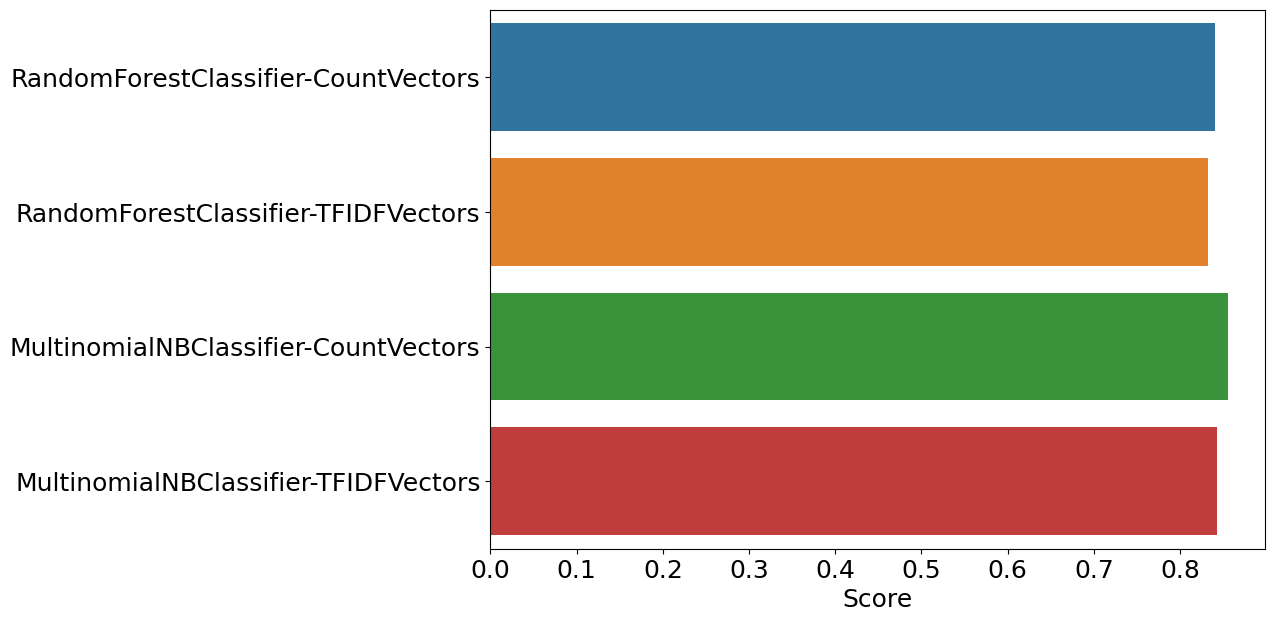

In [33]:
sns.barplot(data=model_df, y='Model', x='Score')
plt.ylabel('')
plt.show()

In [34]:
test_reviews = ['Aplikasinya cukup mulus', 'Pengalaman saya menjadi buruk karena lag', 'Fiturnya banyak, namun UI nya buruk']
pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [35]:
result = pd.DataFrame({'Reviews':test_reviews, 
                       'Outcome': pred_transformed})
result

,Reviews,Outcome
0,Aplikasinya cukup mulus,Positif
1,Pengalaman saya menjadi buruk karena lag,Negatif
2,"Fiturnya banyak, namun UI nya buruk",Negatif
